## Descriptive Statistics

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
df = pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Q1: Mean & Standard Deviation
Calculate the mean and standard deviation of adr (Average Daily Rate).

In [190]:
df['adr'].mean()

101.83112153446686

In [191]:
df['adr'].std()

50.5357902855456

### Q2: Distribution Shape of Lead Time
Check skewness and kurtosis of lead_time. Interpret the result.

In [193]:
df['lead_time'].skew()

1.3465498727254268

##### The distribution of lead_time is moderately to highly right-skewed

In [195]:
df['lead_time'].kurt()

1.6964488485585467

##### This is less than 3, meaning the distribution is platykurtic; The distribution has lighter tails and a flatter peak than a normal distribution.

### Q3: Correlation Check
Compute the Pearson correlation between lead_time and adr. Is it significant?

In [198]:
from scipy.stats import pearsonr

In [199]:
print(f"Pearson coefficient: {pearsonr(df['lead_time'], df['adr'])[0]}")

Pearson coefficient: -0.06307685251681912


##### There is very little to no linear correlation between lead_time (how far in advance a booking is made) and adr (average daily rate). The relationship is very weak and negative, but almost negligible.



| **Metric**                  | **What it tells you**                                      |
| --------------------------- | ---------------------------------------------------------- |
| **Correlation coefficient** | Strength and direction of linear relationship              |
| **P-value**                 | Whether the correlation is statistically significant (≠ 0) |


### Q4: Histogram + Interpretation
Plot a histogram of adr. Comment on its distribution (e.g., right-skewed, outliers, etc.)

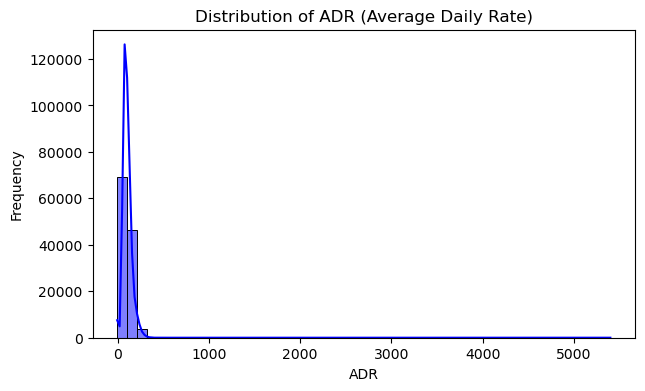

In [203]:
plt.figure(figsize = (7,4))
sns.histplot(df['adr'], bins = 50, kde = True, color='blue')
plt.title('Distribution of ADR (Average Daily Rate)')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.show()

* Right-Skewed Distribution
* Very High Frequency at Low ADR
* Presence of Outliers

### Q5: Top 5 Booking Countries — Mean Stay Duration
Group by top 5 countries and compare mean stay_length (weekend + week nights). Visualize using a bar chart.

In [206]:
df['stay_length'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [207]:
top_5_countries = df['country'].value_counts().head(5).index.to_list()
top_5_countries

['PRT', 'GBR', 'FRA', 'ESP', 'DEU']

In [208]:
top_5_country = df[df['country'].isin(top_5_countries)]
top_5_country = top_5_country.groupby('country')['stay_length'].mean().reset_index(name = 'avg_stay')
top_5_country

,country,avg_stay
0,DEU,3.538768
1,ESP,3.076331
2,FRA,3.509073
3,GBR,4.789513
4,PRT,2.915291


C:\Users\Admin\AppData\Local\Temp\ipykernel_20276\3774700696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_5_country, x = 'country', y = 'avg_stay', palette='pastel')


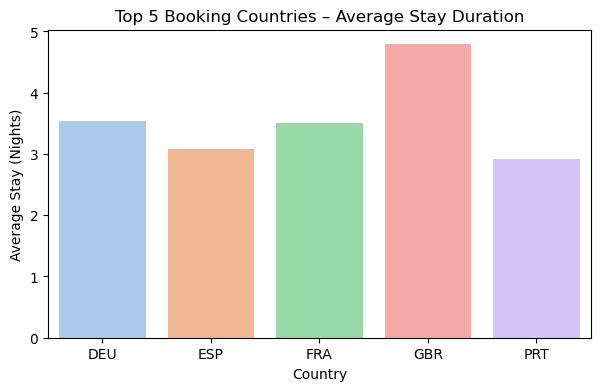

In [209]:
plt.figure(figsize = (7,4))
sns.barplot(data = top_5_country, x = 'country', y = 'avg_stay', palette='pastel')
plt.title('Top 5 Booking Countries – Average Stay Duration')
plt.xlabel('Country')
plt.ylabel('Average Stay (Nights)')
plt.show()

 # Inferential Statistics

### Q1: T-Test: City vs Resort Hotel ADR
Is the average adr significantly different between City Hotel and Resort Hotel?

* H₀ (null hypothesis): The mean ADR of City Hotel = mean ADR of Resort Hotel
* H₁ (alt hypothesis): The mean ADRs are different

In [213]:
from scipy import stats

In [214]:
city_hotel_adr = df[df['hotel'] == 'City Hotel']['adr'].dropna()
resort_hotel_adr = df[df['hotel'] == 'Resort Hotel']['adr'].dropna()

t_stat, p_val = stats.ttest_ind(city_hotel_adr, resort_hotel_adr)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀: Statistically significant difference in ADR between the hotels")
else:
    print("Fail to reject H₀: No statistically significant difference in ADR")

T-statistic: 33.5765, P-value: 0.0000
Reject H₀: Statistically significant difference in ADR between the hotels


### Q2: T-Test: Cancelled vs Not Cancelled Lead Time
Do cancelled bookings have significantly different lead time than non-cancelled ones?

In [216]:
not_canceled_lt = df[df['is_canceled'] == 0]['lead_time']
canceled_lt = df[df['is_canceled'] == 1]['lead_time']


t_stat, p_val = stats.ttest_ind(not_canceled_lt, canceled_lt)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀: Statistically significant difference in lead time.")
else:
    print("Fail to reject H₀: No statistically significant difference in lead time")

T-statistic: -105.9349, P-value: 0.0000
Reject H₀: Statistically significant difference in lead time.


### Q3: Chi-Square Test: Cancellation vs Deposit Type
Test whether cancellation is independent of deposit type.

* Null Hypothesis (H₀): Cancellation status is independent of deposit type.
* Alternative Hypothesis (H₁): Cancellation status depends on deposit type.

In [219]:
from scipy.stats import chi2_contingency

In [220]:
contingency_table = pd.crosstab(df['deposit_type'], df['is_canceled'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", round(chi2, 4))
print("Degrees of Freedom:", dof)
print("P-value:", round(p, 4))

if p < 0.05:
    print("Reject H₀: Cancellation depends on deposit type (statistically significant).")
else:
    print("Fail to reject H₀: No significant relationship between cancellation and deposit type.")

Chi-Square Test Statistic: 27677.3292
Degrees of Freedom: 2
P-value: 0.0
Reject H₀: Cancellation depends on deposit type (statistically significant).


### Q4: ANOVA: ADR by Meal Type
Use ANOVA to test if the average adr differs by different meal types.

* H₀ (Null Hypothesis): Mean ADR is the same across all meal types
* H₁ (Alternative Hypothesis): At least one meal type has a different mean ADR

In [223]:
from scipy.stats import f_oneway

In [224]:
meal_types = df['meal'].unique()

groups = []
for meal in meal_types:
    adr_values = df[df['meal'] == meal]['adr']
    groups.append(adr_values)

In [225]:
f_stat, p_val = f_oneway(*groups)

print("F-statistic:", round(f_stat, 4))
print("P-value:", round(p_val, 4))

if p_val < 0.05:
    print("Reject H₀: At least one meal type has a significantly different ADR.")
else:
    print("Fail to reject H₀: No significant difference in ADR across meal types.")

F-statistic: 575.5296
P-value: 0.0
Reject H₀: At least one meal type has a significantly different ADR.


### Q5: Confidence Interval (95%)
Construct a 95% confidence interval for the average stay duration of guests who didn’t cancel.

In [227]:
df['stay_length'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


In [228]:
non_canceled_stay = df[df['is_canceled'] == 0]['stay_length'].dropna()

sample_mean = np.mean(non_canceled_stay)
sample_std = np.std(non_canceled_stay, ddof=1)
n = len(non_canceled_stay)

z = 1.96
margin_of_error = z * (sample_std / np.sqrt(n))

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"95% Confidence Interval for average stay duration (non-canceled): ({lower_bound:.2f}, {upper_bound:.2f})")

95% Confidence Interval for average stay duration (non-canceled): (3.37, 3.41)
